In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from scipy.stats import ttest_ind, ttest_rel

from scipy import stats

In [2]:
data = pd.read_csv("adult.csv")
data.head()

#exploratory data analysis

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data_num = data.copy()

In [4]:
data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [6]:
data.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
attrib, counts = np.unique(data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass']== '?'] = most_freq_attrib


attrib, counts = np.unique(data['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['occupation'][data['occupation']== '?'] = most_freq_attrib


attrib, counts = np.unique(data['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]

data['native-country'][data['native-country']== '?'] = most_freq_attrib

In [8]:
data.workclass.unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
data['workclass'][data['workclass']=='?']

Series([], Name: workclass, dtype: object)

In [10]:
data.head(10)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


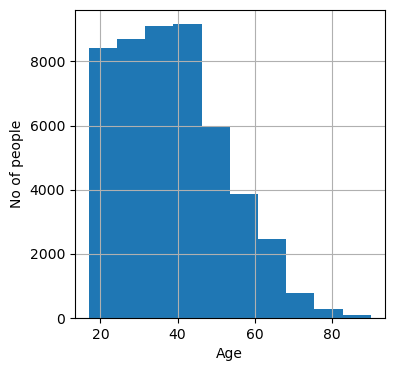

In [11]:
data['age'].hist(figsize=[4,4])
plt.xlabel ('Age')
plt.ylabel('No of people')
plt.show()

In [12]:
data[data(
    'age'>70
)].shape

TypeError: '>' not supported between instances of 'str' and 'int'

In [ ]:
data['hours-per-week'].hist(figsize=[4,4])

plt.show()

In [ ]:
data['capital-gain'].hist(figsize=[4,4])
plt.show()

In [ ]:
data['capital-loss'].hist(figsize=[4,4])
plt.show() 

In [ ]:
data[data['capital-loss']>0].shape

In [ ]:
sns.relplot(x='capital-gain',y= 'capital-loss', data=data) #seaborn relational plot
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.show()

In [ ]:
#categorical data

plt.figure(figsize=[12,8])

total = float(len(data['income']))

ax = sns.countplot(x='workclass', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
    height+3,
    '{:1.2f}'.format((height/total)*100),
    ha="center")
    
plt.show()
    
    

In [ ]:

plt.figure(figsize=[20,8])

total = float(len(data['education']))

ax = sns.countplot(x='education', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
    height+3,
    '{:1.2f}'.format((height/total)*100),
    ha="center")
plt.title('Count plot of education')    
plt.show()
    
    

In [ ]:

plt.figure(figsize=[12,8])

total = float(len(data))

ax = sns.countplot(x='marital-status', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
    height+3,
    '{:1.2f}'.format((height/total)*100),
    ha="center")
    
plt.show()
    
    

In [ ]:
#categorical data

plt.figure(figsize=[25,8])

total = float(len(data))

ax = sns.countplot(x='occupation', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
    height+3,
    '{:1.2f}'.format((height/total)*100),
    ha="center")
    
plt.show()
    
    

In [ ]:
#categorical data

plt.figure(figsize=[15,8])

total = float(len(data))

ax = sns.countplot(x='relationship', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
    height+3,
    '{:1.2f}'.format((height/total)*100),
    ha="center")
    
plt.show()

In [ ]:
#categorical data

plt.figure(figsize=[12,8])

total = float(len(data['income']))

ax = sns.countplot(x='workclass', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
    height+3,
    '{:1.2f}'.format((height/total)*100),
    ha="center")
    
plt.show()
    
    

In [ ]:
#categorical data

plt.figure(figsize=[15,8])

total = float(len(data))

ax = sns.countplot(x='race', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
    height+3,
    '{:1.2f}'.format((height/total)*100),
    ha="center")
    
plt.show()

In [ ]:
#categorical data

plt.figure(figsize=[8,8])

total = float(len(data))

ax = sns.countplot(x='gender', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
    height+3,
    '{:1.2f}'.format((height/total)*100),
    ha="center")
    
plt.show()
    
    

In [ ]:
#categorical data

plt.figure(figsize=[8,8])

total = float(len(data))

ax = sns.countplot(x='income', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
    height+3,
    '{:1.2f}'.format((height/total)*100),
    ha="center")
    
plt.show()
    
    

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="income",y="age",data=data)
plt.show()

In [ ]:
data['income']=data['income'].map({'<=50K' : 0 , '>50K' : 1, '<=50K.':0, '>50K.':1})
data.head()

In [ ]:
data[['income','age']].groupby(['income'], as_index=False).median().sort_values(by='age',ascending=False)

In [ ]:
import random

datatest = data[(np.abs(stats.zscore(data['age']))<3)]

income_1 = datatest[datatest['income']==1]['age']

income_0 = datatest[datatest['income']==0]['age']

income_0 = income_0.values.tolist()
income0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income1 = random.sample(income_1, 100)

In [ ]:
from scipy.stats import ttest_ind

ttest,pval = ttest_ind(income_1, income_0, equal_var = False)

print("ttest", ttest)
print("p value",pval)

if pval <0.05:
    print("we reject null hypothesis hence dependent or have relation")
    
else:
    print("we accept null hypothesis hence independent")

In [ ]:
fig = plt.figure(figsize = (10,10))
sns.boxplot(x="income",y="hours-per-week",data=data)
plt.show()

In [ ]:
data = data[(np.abs(stats.zscore(data["hours-per-week"]))<3]


income_1 = data[data['income']==1]["hours-per-week"]
income_0 = data[data['income']==0]["hours-per-week"]
             
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0,1000)
income_1 = income_1.valuestolist()
income_1 = random.sample(income_1, 1000)
             
ttest, pval = ttest_ind(income_1, income_0, equal_var = False)
             
print("ttest",ttest)
             
print("p.value",pval)
             
if pval <0.05:
             print("we reject null hypothesis")
             
else:
             print(" we accept null hypothesis")

In [ ]:
plt.figure(figsize=[10,7])
sns.boxplot(x="income",y="capital-loss",data=data)
plt.show()

In [ ]:

datatest = data[(np.abs(stats.zscore(data['capital-gain']))<3)]

income_1 = datatest[datatest['income']==1]['age']

income_0 = datatest[datatest['income']==0]['age']

income_0 = income_0.values.tolist()
income0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income1 = random.sample(income_1, 100)

In [ ]:
plt.figure(figsize=(12,10))

ax = sns.countplot(x="workclass", hue="income", data=data)

In [ ]:
c_t = pd.crosstab(data['workclass'].sample(frac=0.004, replace=True, random_state=1),data['income'].sample(frac=0.004,replace= True, random_state = 1),margins=False)
c_t

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)

print('dof=%d' %dof)
print("p-value",p)
print(expected)


if p<0.05:
    print("dependent. reject null hypothesis")

else:
    print("independent. accept null hypothesis")

In [ ]:
plt.figure(figsize=(20,10))

ax = sns.countplot(x="education",hue="income",data=data)
plt.show()

In [ ]:
c_t = pd.crosstab(data['education'].sample(frac=0.004, replace=True, random_state=1),data['income'].sample(frac=0.004,replace= True, random_state = 1),margins=False)
c_t

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)

print('dof=%d' %dof)
print("p-value",p)
print(expected)


if p<0.05:
    print("dependent. reject null hypothesis")

else:
    print("independent. accept null hypothesis")

In [ ]:
plt.figure(figsize=(17,10))

ax = sns.countplot(x="marital-status",hue="income",data=data)
plt.show()

In [ ]:
c_t = pd.crosstab(data['marital-status'].sample(frac=0.004, replace=True, random_state=1),data['income'].sample(frac=0.004,replace= True, random_state = 1),margins=False)
c_t

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)

print('dof=%d' %dof)
print("p-value",p)
print(expected)


if p<0.05:
    print("dependent. reject null hypothesis")

else:
    print("independent. accept null hypothesis")

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.countplot(x="occupation",hue="income",data=data)
plt.show()

In [ ]:
c_t = pd.crosstab(data['occupation'].sample(frac=0.004, replace=True, random_state=1),data['income'].sample(frac=0.004,replace= True, random_state = 1),margins=False)
c_t

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)

print('dof=%d' %dof)
print("p-value",p)
print(expected)


if p<0.05:
    print("dependent. reject null hypothesis")

else:
    print("independent. accept null hypothesis")

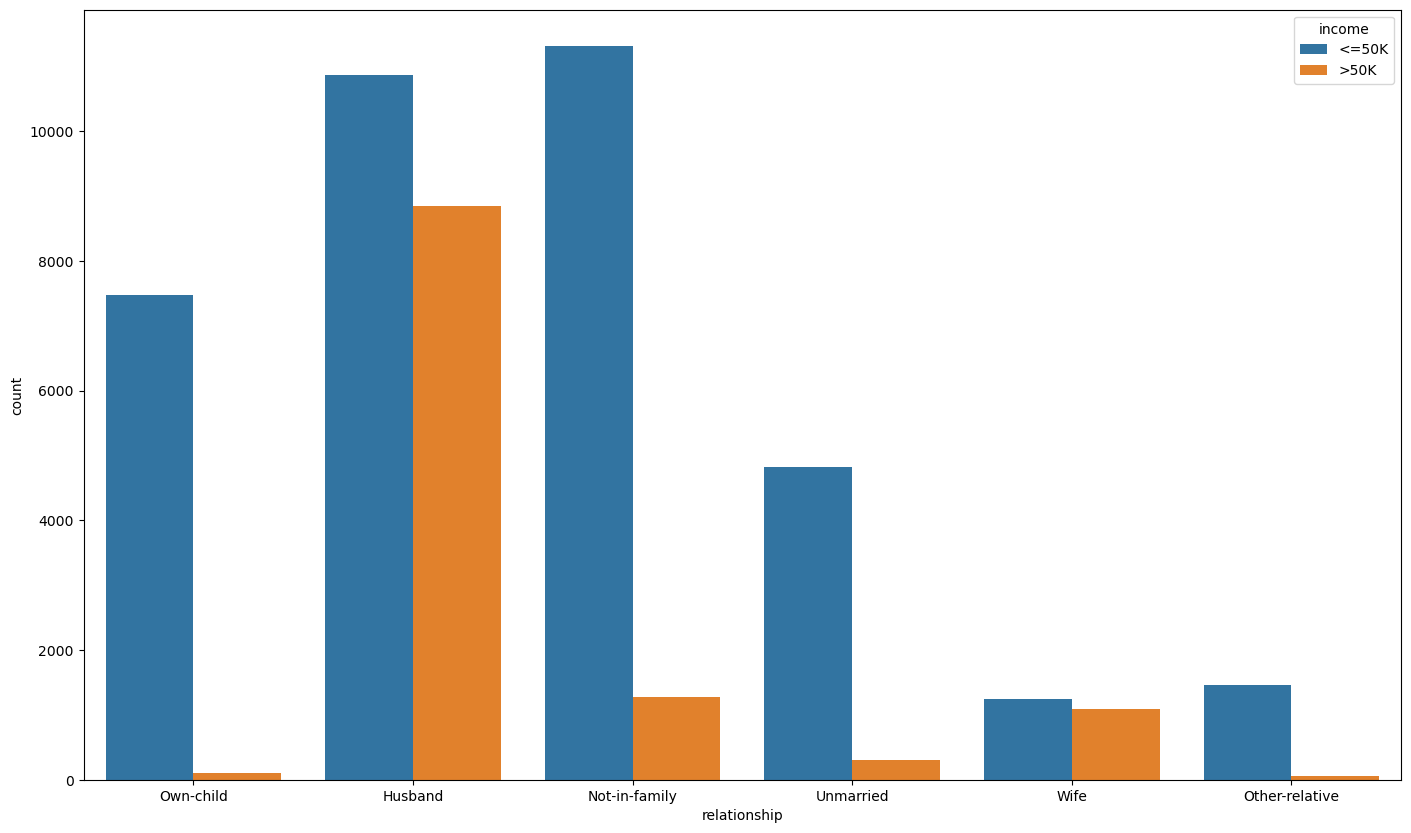

In [14]:
plt.figure(figsize=(17,10))
ax = sns.countplot(x="relationship",hue="income", data=data)

plt.show()

In [ ]:
c_t = pd.crosstab(data['relationship'].sample(frac=0.004, replace=True, random_state=1),data['income'].sample(frac=0.004,replace= True, random_state = 1),margins=False)
c_t

In [16]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)

print('dof=%d' %dof)
print("p-value",p)
print(expected)


if p<0.05:
    print("dependent. reject null hypothesis")

else:
    print("independent. accept null hypothesis")

NameError: name 'c_t' is not defined

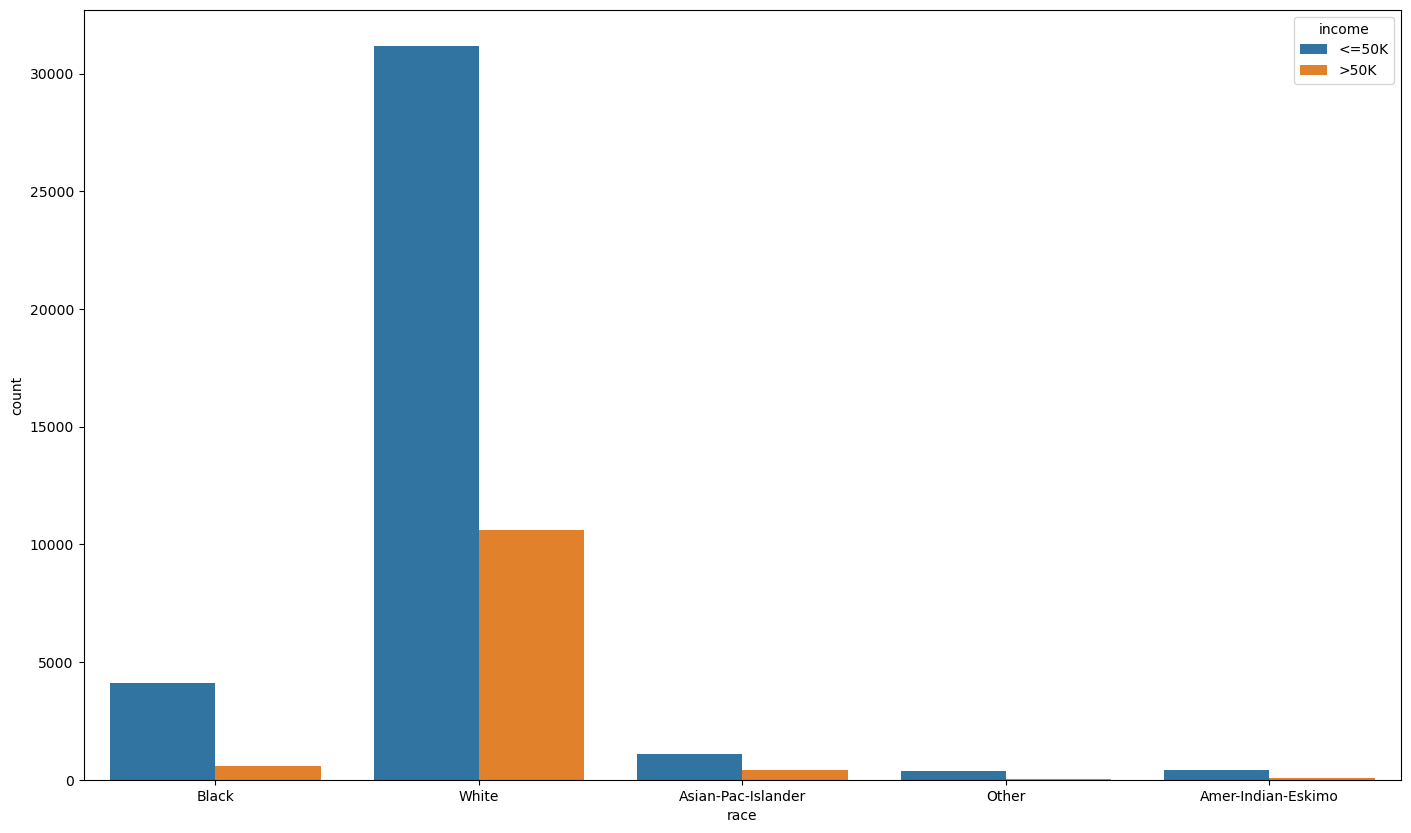

In [17]:
plt.figure(figsize=(17,10))
ax = sns.countplot(x="race",hue="income",data=data)

plt.show()

In [20]:
c_t = pd.crosstab(data['race'].sample(frac=0.004, replace=True, random_state=1),data['income'].sample(frac=0.004,replace= True, random_state = 1),margins=False)
c_t

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,2,1
Asian-Pac-Islander,5,0
Black,9,1
Other,1,0
White,122,54


In [21]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)

print('dof=%d' %dof)
print("p-value",p)
print(expected)


if p<0.05:
    print("dependent. reject null hypothesis")

else:
    print("independent. accept null hypothesis")

dof=4
p-value 0.3435446765086313
[[  2.13846154   0.86153846]
 [  3.56410256   1.43589744]
 [  7.12820513   2.87179487]
 [  0.71282051   0.28717949]
 [125.45641026  50.54358974]]
independent. accept null hypothesis


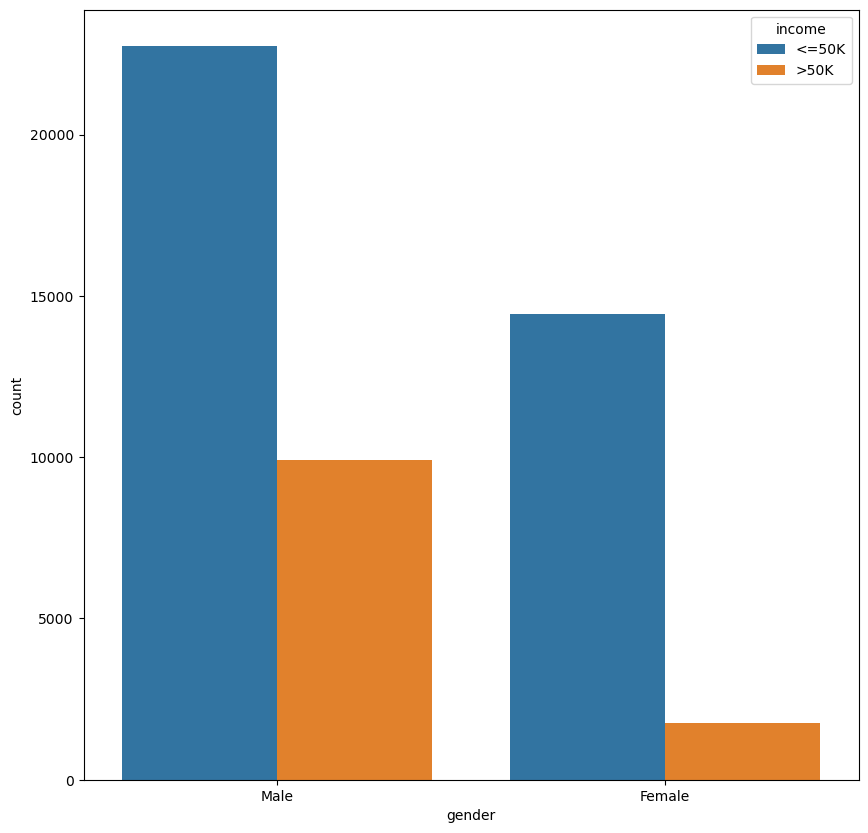

In [23]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x="gender",hue="income", data=data)

plt.show()

In [24]:
c_t = pd.crosstab(data['gender'].sample(frac=0.004, replace=True, random_state=1),data['income'].sample(frac=0.004,replace= True, random_state = 1),margins=False)
c_t

income,<=50K,>50K
gender,,
Female,47,10
Male,92,46


In [25]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)

print('dof=%d' %dof)
print("p-value",p)
print(expected)


if p<0.05:
    print("dependent. reject null hypothesis")

else:
    print("independent. accept null hypothesis")

dof=1
p-value 0.041105383583817524
[[40.63076923 16.36923077]
 [98.36923077 39.63076923]]
dependent. reject null hypothesis


In [26]:
#native country

c_t = pd.crosstab(data['native-country'].sample(frac=0.004, replace=True, random_state=1),data['income'].sample(frac=0.004,replace= True, random_state = 1),margins=False)
c_t

income,<=50K,>50K
native-country,,
China,1,0
Cuba,1,1
Dominican-Republic,1,0
Germany,1,0
India,2,0
Jamaica,1,0
Philippines,1,0
Poland,1,0
Portugal,1,0


In [27]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)

print('dof=%d' %dof)
print("p-value",p)
print(expected)


if p<0.05:
    print("dependent. reject null hypothesis")

else:
    print("independent. accept null hypothesis")

dof=10
p-value 0.9144259912561064
[[  0.71282051   0.28717949]
 [  1.42564103   0.57435897]
 [  0.71282051   0.28717949]
 [  0.71282051   0.28717949]
 [  1.42564103   0.57435897]
 [  0.71282051   0.28717949]
 [  0.71282051   0.28717949]
 [  0.71282051   0.28717949]
 [  0.71282051   0.28717949]
 [  0.71282051   0.28717949]
 [130.44615385  52.55384615]]
independent. accept null hypothesis


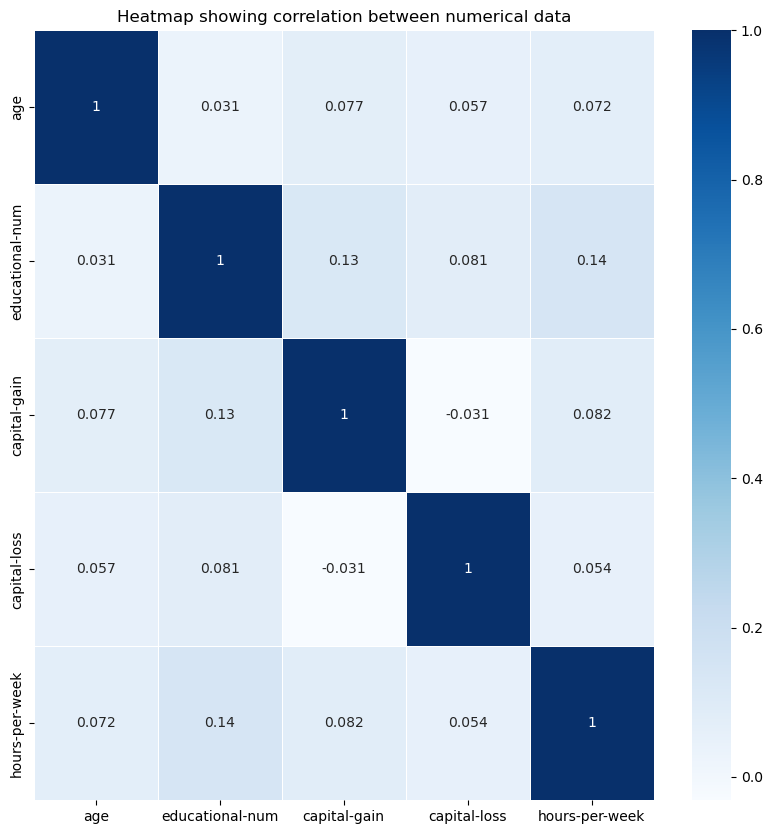

In [32]:
#some multivariate relationships

plt.figure(figsize=(10,10))
sns.heatmap (data_num.corr(),annot=True, linewidth=.5, cmap="Blues")
plt.title("Heatmap showing correlation between numerical data")
plt.show()

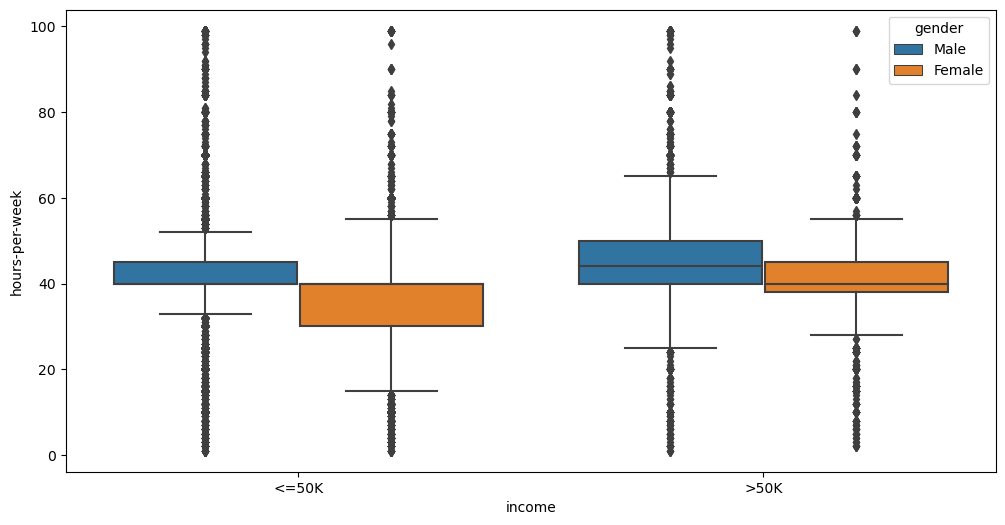

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x="income",y="hours-per-week",hue="gender",data=data)
plt.show()

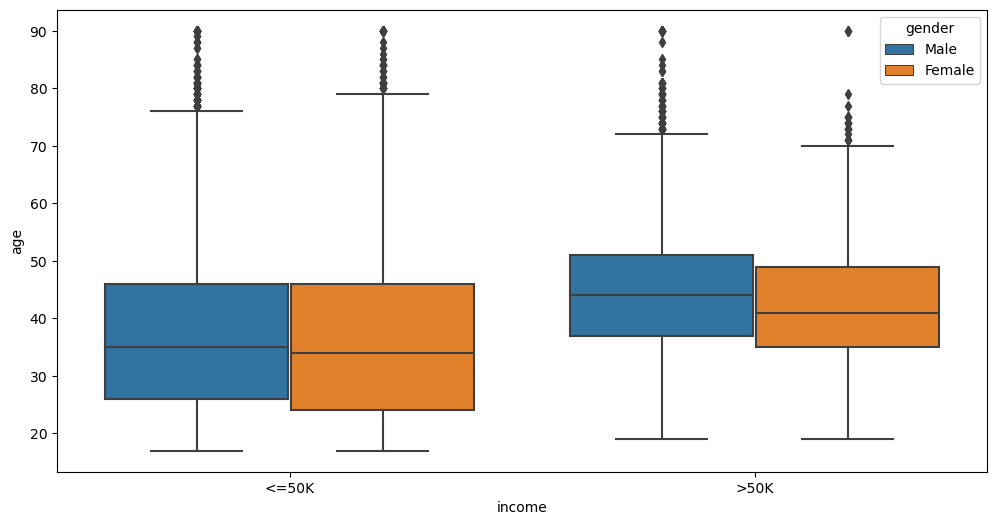

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x="income",y="age",hue="gender",data=data)
plt.show()